In [ ]:
!pip install scipy==1.14.0
!pip install sktime --quiet
!pip install pyts --quiet
!pip install tsfresh --quiet
!pip install git+https://github.com/gon-uri/detach_rocket --quiet

## 1) Download and Prepare Data: NOW MULTIVARIATE

### Download a dataset from the UEA archive

Instead of using the UCR, we will use the UEA, the archive for multivariate time series.
You can still get the description of the datasets in the following webpage: https://www.timeseriesclassification.com/dataset.php

In [59]:
import numpy as np
from detach_rocket.utils_datasets import fetch_uea_dataset, fetch_ucr_dataset
from pyts.datasets import uea_dataset_list, ucr_dataset_list

# Function to convert all labels to 0,1,2,3,4,etc..
def convert_labels_to_integers(labels):
    # Create a mapping of unique labels to integers
    unique_labels = sorted(set(labels))
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}

    # Convert labels using the mapping
    converted_labels = np.asarray([label_to_int[label] for label in labels])
    return converted_labels, label_to_int


def create_data_matrices(current_dataset):

    # Train Matrix
    X_train = current_dataset['data_train'].copy()

    if len(X_train.shape) == 2:
        # This part is to make shure there is no nans of inf in the data
        non_nan_mask_train = ~np.isnan(X_train).any(axis=1)
        non_inf_mask_train = ~np.isinf(X_train).any(axis=1)
        mask_train = np.logical_and(non_nan_mask_train,non_inf_mask_train)
        X_train = X_train[mask_train]
    else:
        # NOTICE TAHAT THIS PART IS DIFFERENT FOR THE MULTIVARIATE CASE
        # This part is to make shure there is no nans of inf in the data
        non_nan_mask_train = ~np.isnan(~np.isnan(X_train).any(axis=1)).any(axis=1) # We have to check in both dimensions (channels and timesteps)
        non_inf_mask_train = ~np.isnan(~np.isnan(X_train).any(axis=1)).any(axis=1) # We have to check in both dimensions (channels and timesteps)
        mask_train = np.logical_and(non_nan_mask_train,non_inf_mask_train)
        X_train = X_train[mask_train]

    # Shuffle dataset to avoid any possible bias (keep indexes to shuffle the labels)
    np.random.seed(42)
    indexes = np.arange(X_train.shape[0])
    np.random.shuffle(indexes)
    X_train = X_train[indexes]


    if len(X_train.shape) == 2:
        X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])

    print(f"Train Matrix Shape: {X_train.shape}")

    # We create the labels
    y_train = current_dataset['target_train'].copy()

    # Conver the labels to integers starting from zero
    y_train, label_to_int = convert_labels_to_integers(y_train)

    # Remove nans also form labels
    y_train = y_train[mask_train]

    # Shuffle the labels in the same way as the data
    y_train = y_train[indexes]

    print(f" ")

    # Test Matrix
    X_test = current_dataset['data_test'].copy()

    if len(X_test.shape) == 2:
        # This part is to make shure there is no nans of inf in the data
        non_nan_mask_test = ~np.isnan(X_test).any(axis=1)
        non_inf_mask_test = ~np.isinf(X_test).any(axis=1)
        mask_test = np.logical_and(non_nan_mask_test,non_inf_mask_test)
        X_test = X_test[mask_test]
    else:
        # NOTICE TAHAT THIS PART IS DIFFERENT FOR THE MULTIVARIATE CASE
        # This part is to make shure there is no nans of inf in the data
        non_nan_mask_test = ~np.isnan(~np.isnan(X_test).any(axis=1)).any(axis=1) # We have to check in both dimensions (channels and timesteps)
        non_inf_mask_test = ~np.isnan(~np.isnan(X_test).any(axis=1)).any(axis=1) # We have to check in both dimensions (channels and timesteps)
        mask_test = np.logical_and(non_nan_mask_test,non_inf_mask_test)
        X_test = X_test[mask_test]

    if len(X_test.shape) == 2:
        X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

    print(f"Test Matrix Shape: {X_test.shape}")

    y_test = current_dataset['target_test'].copy()

    # Remove nans also form labels
    y_test = y_test[mask_test]

    # Conver the labels to integers starting from zero
    y_test = np.asarray([label_to_int[label] for label in y_test])

    # Print the different unique classes
    print(f" ")
    print(f"Unique Classes: {np.unique(y_train)}")
    number_of_classes = len(np.unique(y_train))

    # Print the proportion of each class
    print(f" ")
    for i in np.unique(y_train):
        print(f"Class {i} has {np.sum(y_train==i)/len(y_train)*100:.2f}% of the data")

    return X_train, y_train, X_test, y_test, number_of_classes

# You can later try other UCR datasets (First use WormsTwoClass dataset)
dataset_list_UCR = ucr_dataset_list()
dataset_list_UEA = uea_dataset_list()
print("All UCR Datasets:", dataset_list_UCR)
print("All UEA Datasets:", dataset_list_UEA)

All UCR Datasets: ['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGestureWiimoteZ', 'ArrowHead', 'BME', 'Beef', 'BeetleFly', 'BirdChicken', 'CBF', 'Car', 'Chinatown', 'ChlorineConcentration', 'CinCECGtorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'ECG200', 'ECG5000', 'ECGFiveDays', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'Earthquakes', 'ElectricDevices', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'Insect

Select the dataset to download (it can be univariate (UCR) or multivariate (UEA))

In [81]:
# Download Dataset (UCR)
selected_dataset = ['FordA'] # SelfRegulationSCP1
print("Selected dataset:", selected_dataset)
current_dataset = fetch_ucr_dataset(selected_dataset[0])

# Download Dataset (UEA)
#selected_dataset = ['SelfRegulationSCP1'] # SelfRegulationSCP1
#print("Selected dataset:", selected_dataset)
#current_dataset = fetch_uea_dataset(selected_dataset[0])


# Create data matrices and remove possible rows with nans or infs
print(f"Dataset Matrix Shape: ( # of instances , # of channels , time series length )")
print(f" ")

X_train, y_train, X_test, y_test, number_of_classes = create_data_matrices(current_dataset)

Selected dataset: ['FordA']
Dataset Matrix Shape: ( # of instances , # of channels , time series length )
 
Train Matrix Shape: (3601, 1, 500)
 
Test Matrix Shape: (1320, 1, 500)
 
Unique Classes: [0 1]
 
Class 0 has 51.26% of the data
Class 1 has 48.74% of the data


**About the *FordA* dataset:** This data was originally used in a competition in the IEEE World Congress on Computational Intelligence, 2008. The classification problem is to diagnose whether a certain symptom exists or does not exist in an automotive subsystem. Each case consists of 500 measurements of engine noise and a classification. There are two separate problems: For FordA the Train and test data set were collected in typical operating conditions, with minimal noise contamination.

### Create the corresponding Train and Test matrices

We unpack the dictionary downloaded form the UCR into the train and test matrices that we will use for training our models.

### Plotting the time series data

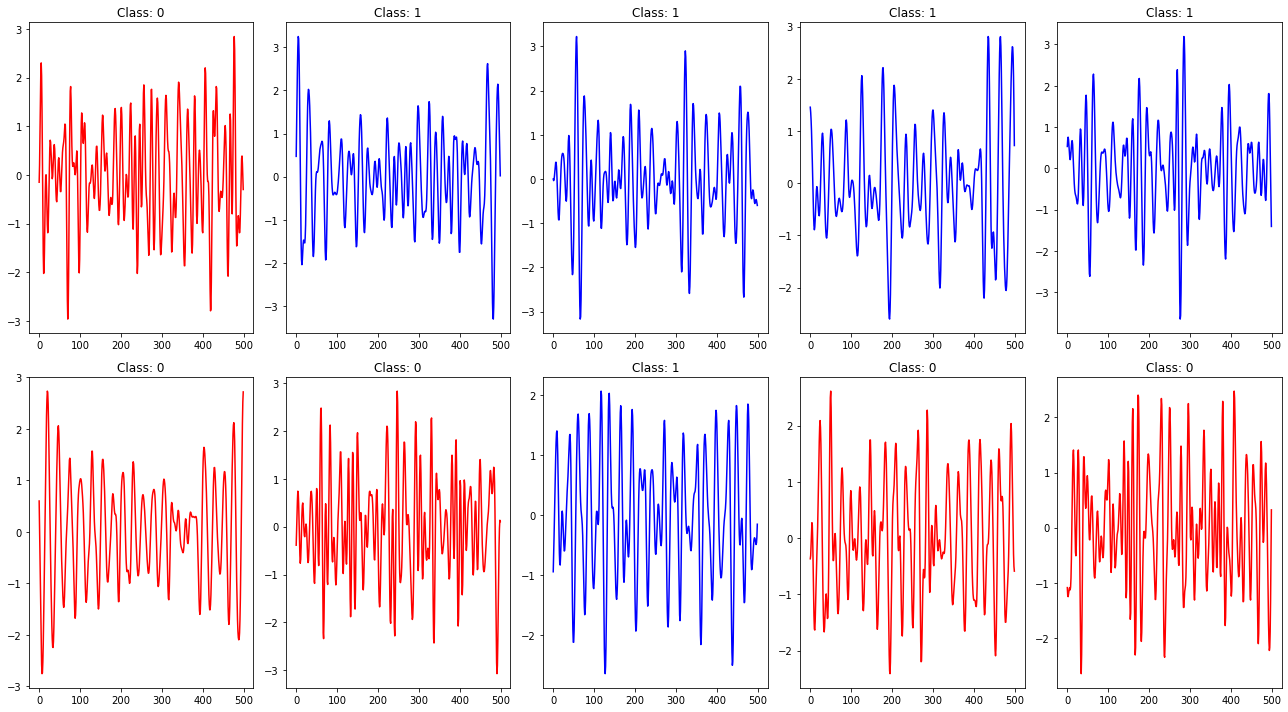

In [82]:
# Plot the 10 instances in a subplot
import matplotlib.pyplot as plt

if X_train.shape[1] > 1:
    # Plot the first 10 instances of the multivariate time series data of shape (num_instances, num_channels, num_timesteps)
    plt.figure(figsize=(18,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        idx = np.random.randint(0,X_train.shape[0])
        for j in range(X_train.shape[1]):
            # We add an offset to the data to make it more readable
            offset = 10
            plt.plot(X_train[idx,j,:]+10*j, label=f"Channel {j}")
        plt.legend()

        plt.title(f"Class {y_train[idx]}")
    plt.show()

else:
    # Create a dictionary to map the class to a color
    color_dict = {0:'red',1:'blue',2:'green',3:'yellow',4:'black',5:'orange',6:'purple',7:'pink',8:'brown',9:'cyan', -1:'cyan'}

    # Plot the first 10 instances
    plt.figure(figsize=(18,10))
    for i in range(10):
        # Pick random instance
        idx = np.random.randint(0,X_train.shape[0])
        plt.subplot(2,5,i+1)
        plt.plot(X_train[idx,0,:],color=color_dict[y_train[idx]])
        plt.title(f"Class: {y_train[idx]}")
    plt.tight_layout()
    plt.show()


Notice that the values in each EEG channel are not exactly the same, but they are highly correlated!

## 2) Detach-ROCKET classifier

We will use the detach-ROCKET library. The detach models work as scikit learn models, the fit() method will first transform the data, then sequentially prune the resulting features, and finally select the optimal model. 

The default Detach classifier methodology will randomly split the given training data set into a training and a validation set (the default validation ratio is val_ratio=0.33, but it can be changed). If we want to automatically select the optimal model size, we need a representative validation set. You can also specify an particular validation set and pass it to the function as X_val=X_val and y_val=y_val.

In [83]:
from detach_rocket.detach_classes import DetachRocket

# Select model type (rocket, minirocket, multirocket)
model_type = "rocket"

# Create model object
DetachRocketModel = DetachRocket(model_type)

# Trian Model
DetachRocketModel.fit(X_train,y_train)

# Evaluate Performance on Test Set
detach_test_score, full_test_score= DetachRocketModel.score(X_test,y_test)
print('Test Accuracy Full Model: {:.2f}%'.format(100*full_test_score))
print('Test Accuracy Detach-ROCKET: {:.2f}%'.format(100*detach_test_score))

TRAINING RESULTS Full ROCKET:
Optimal Alpha Full ROCKET: 4832.93
Train Accuraccy Full ROCKET: 99.69%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 37.93
Train Accuraccy Detach Model: 95.31%
-------------------------
Test Accuraccy Full Model: 94.17%
Test Accuraccy Detach-ROCKET: 94.55%


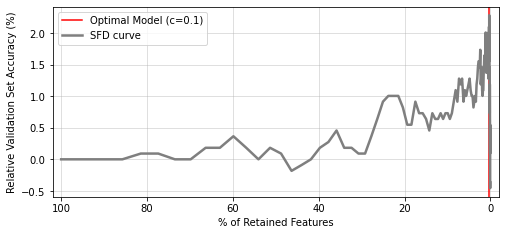

Optimal Model Size: 0.26% of full model
 
Number of kernels of the full model: 10000
Number of kernels of the optimal model: 26.0


In [87]:
import matplotlib.pyplot as plt

percentage_vector = DetachRocketModel._percentage_vector
acc_curve = DetachRocketModel._sfd_curve

c = DetachRocketModel.trade_off

x=(percentage_vector) * 100
y=(acc_curve/acc_curve[0]-1) * 100

point_x = x[DetachRocketModel._max_index]
#point_y = y[DetachRocketModel._max_index]

plt.figure(figsize=(8,3.5))
plt.axvline(x = point_x, color = 'r',label=f'Optimal Model (c={c})')
plt.plot(x, y, label='SFD curve', linewidth=2.5, color='C7', alpha=1)
#plt.scatter(point_x, point_y, s=50, marker='o', label=f'Optimal point (c={c})')

plt.grid(True, linestyle='-', alpha=0.5)
plt.xlim(102,-2)
plt.xlabel('% of Retained Features')
plt.ylabel('Relative Validation Set Accuracy (%)')
plt.legend()
plt.show()

print('Optimal Model Size: {:.2f}% of full model'.format(point_x))

print(" ")
print("Number of kernels of the full model:", DetachRocketModel.num_kernels)
print("Number of kernels of the optimal model:", int(point_x* DetachRocketModel.num_kernels/100))

Lets now download an smaller dataset.

In [88]:
selected_dataset = ['Computers']
current_dataset = fetch_ucr_dataset(selected_dataset[0])
# Create data matrices and remove possible rows with nans or infs
print(f"Dataset Matrix Shape: ( # of instances , # of channels , time series length )")
X_train, y_train, X_test, y_test, number_of_classes = create_data_matrices(current_dataset)

Dataset Matrix Shape: ( # of instances , # of channels , time series length )
Train Matrix Shape: (250, 1, 720)
 
Test Matrix Shape: (250, 1, 720)
 
Unique Classes: [0 1]
 
Class 0 has 50.00% of the data
Class 1 has 50.00% of the data


If we have an smaller dataset, we may want to keep all the instances belonging to X_train set for training. In these cases in which it is too costly to separate a validation set, we can fix the amount of features we want to keep to a given percentage. We usually recommend 10% for ROCKET/minirocket and 5% for MultiRocket.

In [90]:
from detach_rocket.detach_classes import DetachRocket

# Select model type (rocket, minirocket, multirocket)
model_type = "rocket"

# Create model object
DetachRocketModel = DetachRocket(model_type, fixed_percentage=0.1)

# Trian Model
DetachRocketModel.fit(X_train,y_train,X_test=X_test,y_test=y_test)

# Evaluate Performance on Test Set
detach_test_score, full_test_score= DetachRocketModel.score(X_test,y_test)
print('Test Accuracy Full Model: {:.2f}%'.format(100*full_test_score))
print('Test Accuracy Detach-ROCKET: {:.2f}%'.format(100*detach_test_score))

TRAINING RESULTS Full ROCKET:
Optimal Alpha Full ROCKET: 428.13
Train Accuraccy Full ROCKET: 99.60%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 37.93
Train Accuraccy Detach Model: 100.00%
-------------------------
Test Accuraccy Full Model: 77.20%
Test Accuraccy Detach-ROCKET: 75.20%


## 3) Using the SFD feature selection method for other transformations

ROCKET is a transformation that we can perform on our time series data, but there are other transformations that we can use. For example, we saw that TSFresh produces a large amount of features for each time series. We can use SFD to select an optimal subset of those features (in fact we can use it on any dataset with a large number of features, not only datasets coming from time series)

In [92]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

# Create TSFresh trasformation
ts_fresh_transform = TSFreshFeatureExtractor(default_fc_parameters="comprehensive", show_warnings=False, disable_progressbar=False)

# Fit and transform Time Series
X_train_ts = ts_fresh_transform.fit_transform(X_train)
X_test_ts = ts_fresh_transform.transform(X_test)

print(f"TSFresh Features Matrix Shape: ( # of instances , # of features )")
print(f" ")
print(f"Train: {X_train_ts.shape}")
print(f" ")
print(f"Test: {X_test_ts.shape}")

Feature Extraction: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]


TSFresh Features Matrix Shape: ( # of instances , # of features )
 
Train: (250, 783)
 
Test: (250, 783)


In [93]:
from detach_rocket.detach_classes import DetachMatrix

# Create model object for matrix data
# The matrix should be of shape (num_instances, num_features)
DetachMatrixModel = DetachMatrix()

# Train the Model
DetachMatrixModel.fit(X_train_ts,y_train)

# Evaluate Performance on the Test Set
detach_test_score, full_test_score= DetachMatrixModel.score(X_test_ts,y_test)
print('Test Accuraccy Full Model: {:.2f}%'.format(100*full_test_score))
print('Test Accuraccy Detach Model: {:.2f}%'.format(100*detach_test_score))

TRAINING RESULTS Full Features:
Optimal Alpha Full Features: 428.13
Train Accuraccy Full Features: 98.40%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 0.03
Train Accuraccy Detach Model: 84.80%
-------------------------
Test Accuraccy Full Model: 72.40%
Test Accuraccy Detach Model: 72.40%


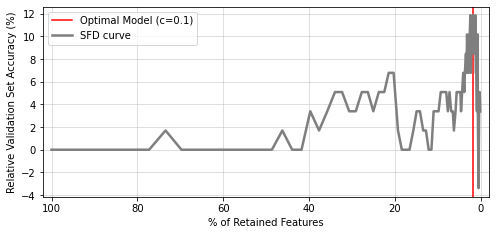

Optimal Model Size: 1.79% of full model
 
Original number of features: 783
Number of features after selection: 13


In [95]:
import matplotlib.pyplot as plt

percentage_vector = DetachMatrixModel._percentage_vector
acc_curve = DetachMatrixModel._sfd_curve

c = DetachMatrixModel.trade_off

x=(percentage_vector) * 100
y=(acc_curve/acc_curve[0]-1) * 100

point_x = x[DetachMatrixModel._max_index]
#point_y = y[DetachMatrixModel._max_index]

plt.figure(figsize=(8,3.5))
plt.axvline(x = point_x, color = 'r',label=f'Optimal Model (c={c})')
plt.plot(x, y, label='SFD curve', linewidth=2.5, color='C7', alpha=1)
#plt.scatter(point_x, point_y, s=50, marker='o', label=f'Optimal point (c={c})')

plt.grid(True, linestyle='-', alpha=0.5)
plt.xlim(102,-2)
plt.xlabel('% of Retained Features')
plt.ylabel('Relative Validation Set Accuracy (%)')
plt.legend()
plt.show()

print('Optimal Model Size: {:.2f}% of full model'.format(point_x))

print(" ")
print("Original number of features:", X_train_ts.shape[1])
print("Number of features after selection:", int(point_x* X_train_ts.shape[1]/100))